#**Feature Selection - Predição de Churn para Empresa de Telecomunicação**

Após o pré-processamento dos dados, foi realizada a seleção de variáveis com o objetivo de reduzir a dimensionalidade do problema e concentrar o modelo nos atributos mais relevantes para a previsão de churn.

1. Treinamento inicial do modelo

    - Foi utilizado o algoritmo Random Forest para avaliar a importância dos atributos.

    - O modelo foi treinado com todas as variáveis explicativas disponíveis no conjunto tratado.

2. Cálculo das importâncias

    - Para cada variável, o Random Forest atribuiu um peso que representa sua relevância na previsão do churn.

    - As variáveis foram ordenadas por importância e comparadas com a maior relevância encontrada.

3. Definição do critério de corte

    - Estabeleceu-se como critério manter apenas as variáveis cuja importância fosse maior ou igual a 10% da maior importância observada.

    - Essa regra eliminou variáveis de baixa contribuição, reduzindo ruído e melhorando a eficiência do modelo.

4. Visualização dos resultados

    - Foi gerado um gráfico de barras horizontais destacando as variáveis mais relevantes e seus respectivos pesos de importância.

    - Também foi construído um heatmap de correlação, evidenciando as relações entre as variáveis selecionadas.

5. Construção das novas bases

    - Criou-se uma nova lista de features (loaded_lista) com as variáveis selecionadas.

    - Foram gerados os datasets abt_01 (treino) e abt_01_test (teste), contendo apenas essas variáveis e a variável alvo Churn.

Com isso, a base de dados passou a conter apenas os atributos mais significativos, prontos para serem utilizados na próxima etapa do projeto: o treinamento e avaliação de modelos preditivos

**1. Preparação do Ambiente e Leitura de Dados Após Processo de Data Prep**


In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


O código carrega a base de treino abt_train.csv, remove colunas desnecessárias como índices extras (Unnamed: 0, Unnamed: 0.1) e o identificador customerID, garantindo que o dataset fique limpo e apenas com variáveis úteis para a modelagem. Em seguida, utiliza .shape para verificar o número de linhas e colunas restantes, confirmando a estrutura final da base.

In [ ]:
abt_00 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos/Predicao de Churn - Empresa Telecom/abt_train.csv')
abt_00.drop(axis=1,columns=['Unnamed: 0','customerID','Unnamed: 0.1'],inplace=True, errors='ignore')
abt_00.shape

(4930, 31)

In [ ]:
abt_00.head()

SeniorCitizen    tenure  MonthlyCharges  TotalCharges  gender_Male  \
0      -0.436831  0.881078        0.195927      0.654499     0.968056   
1      -0.436831 -1.284263        0.522755     -0.974070     0.968056   
2      -0.436831 -0.793997       -1.509551     -0.895013     0.968056   
3       2.289215 -0.344587        1.053643     -0.010511    -1.032999   
4       2.289215 -1.079985        0.308740     -0.810593    -1.032999   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0     1.030066        1.518718          0.323478   
1    -0.970811       -0.658450          0.323478   
2    -0.970811       -0.658450          0.323478   
3     1.030066        1.518718          0.323478   
4    -0.970811       -0.658450          0.323478   

   MultipleLines_No phone service  MultipleLines_Yes  ...  StreamingTV_Yes  \
0                       -0.323478           1.153199  ...         1.259591   
1                       -0.323478          -0.867153  ...         1.259591   
2                       -0.323478          -0.867153  ...        -0.793909   
3                       -0.323478          -0.867153  ...         1.259591   
4                       -0.323478          -0.867153  ...        -0.793909   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                            -0.528699            -0.800374   
1                            -0.528699            -0.800374   
2                             1.891436            -0.800374   
3                            -0.528699             1.249415   
4                            -0.528699            -0.800374   

   Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
0           1.917660          -0.562826              0.841222   
1          -0.521469          -0.562826              0.841222   
2           1.917660          -0.562826             -1.188746   
3          -0.521469           1.776747              0.841222   
4          -0.521469          -0.562826              0.841222   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                              -0.524928                        1.399708   
1                              -0.524928                        1.399708   
2                               1.905022                       -0.714435   
3                              -0.524928                        1.399708   
4                              -0.524928                        1.399708   

   PaymentMethod_Mailed check  Churn  
0                   -0.539991      0  
1                   -0.539991      0  
2                   -0.539991      0  
3                   -0.539991      0  
4                   -0.539991      0  

[5 rows x 31 columns]

**2. Treinamento do modelo com algoritmo Random Forest**

A próxima etapa é realizar o treinamento do modelo preditivo utilizando o algoritmo Random Forest. Primeiro, o dataset é dividido em variáveis independentes (X) e variável alvo (y), sendo que a coluna Churn é definida como target e todas as demais colunas são usadas como preditoras. Em seguida, é instanciado o classificador RandomForestClassifier(), um modelo baseado em múltiplas árvores de decisão que combina os resultados de várias árvores para aumentar a robustez e reduzir overfitting. Por fim, o método .fit(X, y) treina o modelo com os dados disponíveis, ajustando os parâmetros internos para aprender os padrões que diferenciam clientes que permaneceram daqueles que cancelaram o serviço.

In [ ]:
X = abt_00.drop(axis=1,columns='Churn')
y = abt_00.Churn

# Treinar modelo com algoritmo Random Forest
clf = RandomForestClassifier() # troque aqui qual classificador quer ut ilizar: GradientBoostingClassifier, DecisionTreeClassifier
clf.fit(X, y)

RandomForestClassifier()

**3. Importância das variáveis**

Nesta etapa foi realizada a seleção de variáveis utilizando a importância de atributos fornecida pelo algoritmo Random Forest. Para cada variável explicativa, o modelo atribuiu um peso que representa sua relevância na previsão de churn. As variáveis foram então classificadas por ordem de importância e estabeleceu-se um limite de corte equivalente a 10% da maior importância observada. Apenas as variáveis acima desse limite foram mantidas para análises posteriores, reduzindo a dimensionalidade do problema e concentrando o modelo nas informações mais significativas. Essa abordagem permite eliminar atributos de baixa contribuição, tornando o treinamento mais eficiente e aumentando o potencial de generalização do modelo. Além disso, foi gerado um gráfico de barras horizontais para facilitar a visualização das variáveis selecionadas e seus respectivos pesos de importância.

O gráfico mostra as 16 variáveis mais relevantes para o modelo de previsão de churn segundo a importância atribuída pelo Random Forest.

Número de features selecionadas:  16


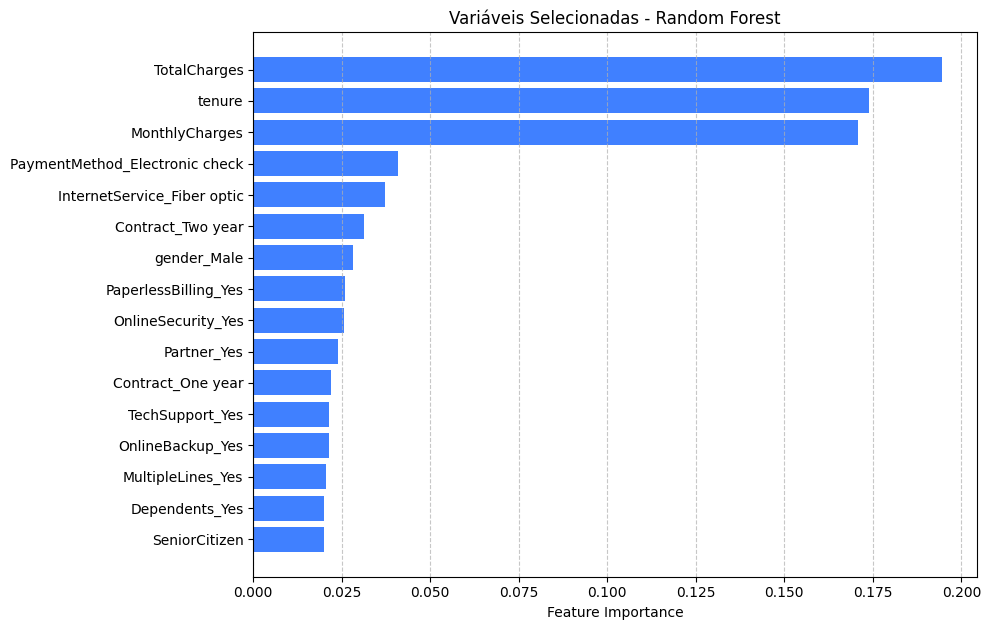

In [ ]:
# Obter importância das variáveis
feature_importances = clf.feature_importances_
features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Ordenar variáveis por importância
features = features.sort_values(by='Importance', ascending=False)

# Estabelecer um limite de corte, por exemplo, x% da importância máxima
cutoff_maximp = 0.10

cutoff = cutoff_maximp * feature_importances.max()

# Selecionar variáveis acima do corte
selected_features = X.columns[feature_importances > cutoff].tolist()
print('Número de features selecionadas: ',len(selected_features))

# Ordenar variáveis por importância
features = features.sort_values(by='Importance', ascending=True)

# Filtrar o DataFrame para apenas as features acima do corte
selected_features_df = features[features['Importance'] > cutoff]

# Ajusta o tamanho da figura com base no número de features selecionadas
plt.figure(figsize=(10, len(selected_features_df)*0.4))

# Plota as features selecionadas
plt.barh(selected_features_df['Feature'], selected_features_df['Importance'], color=(0.25, 0.5, 1))
plt.xlabel("Feature Importance")
plt.title("Variáveis Selecionadas - Random Forest")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
selected_features


['SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'gender_Male',
 'Partner_Yes',
 'Dependents_Yes',
 'MultipleLines_Yes',
 'InternetService_Fiber optic',
 'OnlineSecurity_Yes',
 'OnlineBackup_Yes',
 'TechSupport_Yes',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_Yes',
 'PaymentMethod_Electronic check']

**4. Correlação de Pearson**

Após a seleção de variáveis, foi analisada a correlação entre os atributos escolhidos por meio de um heatmap. A função plot_correlation_heatmap gera uma matriz de correlação entre as variáveis numéricas selecionadas, exibindo-a visualmente com a biblioteca Seaborn. Essa análise é fundamental para identificar relações lineares fortes entre variáveis, o que pode indicar redundância de informação. Com isso, é possível avaliar a necessidade de remover variáveis altamente correlacionadas, reduzindo multicolinearidade e tornando o modelo mais robusto.

Principais Observações:

  - 1. Correlação muito forte:

      - TotalCharges tem correlação alta com tenure (0.83) e MonthlyCharges (0.65), o que faz sentido, já que o valor total pago é resultado do tempo como cliente multiplicado pelos valores mensais.

      - MonthlyCharges também se correlaciona fortemente com InternetService_Fiber optic (0.78), indicando que clientes com fibra óptica costumam pagar valores mais altos.

  - 2. Correlação moderada

      - Contract_Two year tem correlação positiva com tenure (0.56), mostrando que contratos de longo prazo estão associados a maior tempo de permanência.

      - Serviços adicionais, como OnlineSecurity_Yes, TechSupport_Yes e OnlineBackup_Yes, apresentam correlação moderada entre si (em torno de 0.3 a 0.4), sugerindo que clientes que contratam um serviço extra tendem a contratar outros.

  - 3. Correlação baixa ou nula

      - Variáveis como gender_Male, Partner_Yes e Dependents_Yes têm baixíssima correlação com as demais, indicando pouca relação linear.

      - Isso reforça a análise anterior de que dados demográficos têm menor peso comparado a fatores contratuais e financeiros.

O heatmap reforça que as variáveis financeiras (TotalCharges, MonthlyCharges, tenure) e contratuais (Contract_Two year, InternetService_Fiber optic) são as mais interligadas e impactantes no comportamento do cliente. Já atributos demográficos aparecem pouco correlacionados, sugerindo menor contribuição direta na previsão de churn.

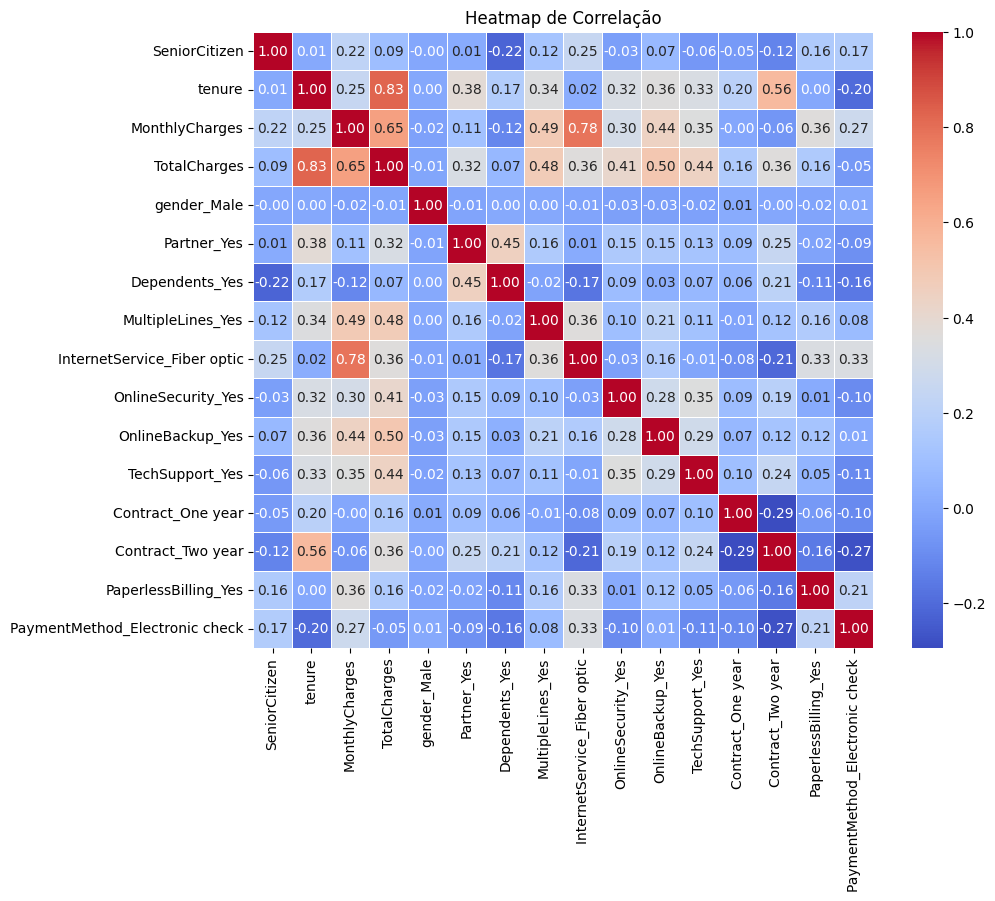

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_correlation_heatmap(dataframe, selected_features):
    # Subconjunto do DataFrame com as variáveis selecionadas
    subset_dataframe = dataframe[selected_features]

    # Calcula a matriz de correlação
    correlation_matrix = subset_dataframe.corr()

    # Configuração do heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

    # Adiciona título
    plt.title('Heatmap de Correlação')

    # Exibe o heatmap
    plt.show()

# Exemplo de uso:
# Supondo que 'df' seja o seu DataFrame e 'selected_features' seja a lista de variáveis
plot_correlation_heatmap(abt_00, selected_features)

In [ ]:
# Salvar a lista em um arquivo .pkl
import pickle
with open('/content/drive/MyDrive/Colab Notebooks/Projetos/Predicao de Churn - Empresa Telecom/02 - Feature Selection/prd_list_features.pkl', 'wb') as f:
    pickle.dump(selected_features, f)


In [ ]:
# Carregar a lista do arquivo .pkl
with open('/content/drive/MyDrive/Colab Notebooks/Projetos/Predicao de Churn - Empresa Telecom/02 - Feature Selection/prd_list_features.pkl', 'rb') as f:
    loaded_lista = pickle.load(f)

print(loaded_lista)


['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'TechSupport_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Electronic check']


Esse código cria uma nova base contendo apenas as variáveis selecionadas na etapa de feature selection e a coluna alvo Churn, filtrando o DataFrame original para manter somente os atributos relevantes e preparando os dados para a modelagem.

In [ ]:
lista_features = loaded_lista + ['Churn']
abt_01 = abt_00[lista_features]

abt_01.head()


SeniorCitizen    tenure  MonthlyCharges  TotalCharges  gender_Male  \
0      -0.436831  0.881078        0.195927      0.654499     0.968056   
1      -0.436831 -1.284263        0.522755     -0.974070     0.968056   
2      -0.436831 -0.793997       -1.509551     -0.895013     0.968056   
3       2.289215 -0.344587        1.053643     -0.010511    -1.032999   
4       2.289215 -1.079985        0.308740     -0.810593    -1.032999   

   Partner_Yes  Dependents_Yes  MultipleLines_Yes  \
0     1.030066        1.518718           1.153199   
1    -0.970811       -0.658450          -0.867153   
2    -0.970811       -0.658450          -0.867153   
3     1.030066        1.518718          -0.867153   
4    -0.970811       -0.658450          -0.867153   

   InternetService_Fiber optic  OnlineSecurity_Yes  OnlineBackup_Yes  \
0                    -0.882690           -0.634162          1.370398   
1                     1.132901           -0.634162         -0.729715   
2                    -0.882690           -0.634162         -0.729715   
3                     1.132901           -0.634162         -0.729715   
4                     1.132901            1.576884         -0.729715   

   TechSupport_Yes  Contract_One year  Contract_Two year  \
0         1.566008           1.917660          -0.562826   
1        -0.638566          -0.521469          -0.562826   
2        -0.638566           1.917660          -0.562826   
3        -0.638566          -0.521469           1.776747   
4        -0.638566          -0.521469          -0.562826   

   PaperlessBilling_Yes  PaymentMethod_Electronic check  Churn  
0              0.841222                        1.399708      0  
1              0.841222                        1.399708      0  
2             -1.188746                       -0.714435      0  
3              0.841222                        1.399708      0  
4              0.841222                        1.399708      0

In [ ]:
# Carregamento e Limpeza da Base de Teste
abt_01_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos/Predicao de Churn - Empresa Telecom/abt_test.csv')
abt_01_test.drop(axis=1,columns=['Unnamed: 0','customerID','Unnamed: 0.1'],inplace=True, errors = 'ignore')
abt_01_test.shape


(2113, 31)

In [ ]:
abt_01_test.head()


SeniorCitizen    tenure  MonthlyCharges  TotalCharges  gender_Male  \
0      -0.436831 -1.284263       -1.327058     -0.998679    -1.032999   
1      -0.436831  0.349957       -1.312127     -0.569780     0.968056   
2      -0.436831  0.799367       -1.507892     -0.554221    -1.032999   
3      -0.436831 -1.284263        0.383397     -0.975924    -1.032999   
4      -0.436831  1.412199       -0.472660      0.429422     0.968056   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0     1.030066       -0.658450         -3.091399   
1    -0.970811       -0.658450          0.323478   
2     1.030066        1.518718          0.323478   
3    -0.970811       -0.658450          0.323478   
4    -0.970811       -0.658450          0.323478   

   MultipleLines_No phone service  MultipleLines_Yes  ...  StreamingTV_Yes  \
0                        3.091399          -0.867153  ...        -0.793909   
1                       -0.323478           1.153199  ...        -0.793909   
2                       -0.323478          -0.867153  ...        -0.793909   
3                       -0.323478          -0.867153  ...        -0.793909   
4                       -0.323478          -0.867153  ...        -0.793909   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                            -0.528699            -0.800374   
1                             1.891436            -0.800374   
2                             1.891436            -0.800374   
3                            -0.528699            -0.800374   
4                            -0.528699            -0.800374   

   Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
0          -0.521469          -0.562826              0.841222   
1          -0.521469          -0.562826              0.841222   
2          -0.521469           1.776747             -1.188746   
3          -0.521469          -0.562826             -1.188746   
4          -0.521469           1.776747             -1.188746   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                              -0.524928                        1.399708   
1                              -0.524928                       -0.714435   
2                              -0.524928                       -0.714435   
3                              -0.524928                        1.399708   
4                              -0.524928                       -0.714435   

   PaymentMethod_Mailed check  Churn  
0                   -0.539991      1  
1                   -0.539991      0  
2                    1.851883      0  
3                   -0.539991      1  
4                   -0.539991      0  

[5 rows x 31 columns]

**5. Salvando abt para treinamento dos modelos**


In [ ]:
# Salvando abt para treinamento dos modelos

abt_01.to_csv('/content/drive/MyDrive/Colab Notebooks/Projetos/Predicao de Churn - Empresa Telecom/abt_fs01_train.csv')
abt_01_test.to_csv('/content/drive/MyDrive/Colab Notebooks/Projetos/Predicao de Churn - Empresa Telecom/abt_fs01_test.csv')


#**Conclusão**

A etapa de seleção de variáveis permitiu identificar e manter apenas os atributos mais relevantes para a previsão de churn. Através da importância dos atributos fornecida pelo algoritmo Random Forest, foram eliminadas variáveis de baixa contribuição, reduzindo a dimensionalidade do problema e aumentando a eficiência do processo de modelagem. Além disso, as análises gráficas evidenciaram que fatores financeiros e contratuais se destacam como determinantes no comportamento de evasão, enquanto atributos demográficos apresentaram menor relevância. Como resultado, foram gerados datasets otimizados, compostos apenas pelas variáveis mais significativas e pela variável alvo.

Com as bases ajustadas e otimizadas, inicia-se agora a etapa de modelagem preditiva, na qual serão aplicados diferentes algoritmos de machine learning para prever a probabilidade de churn de cada cliente.

